In [ ]:
!pip install diffprivlib==0.5.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import diffprivlib.models as dp
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from fil import FIL_Logistic, FIL_Linear
from utils import *

# FIL on Logistic regression 

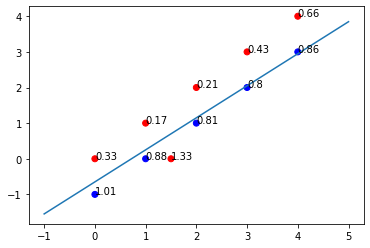

In [ ]:
# define dataset
X = np.array([[x, x] for x in range(5)] + [[x, x-1] for x in range(5)])
X = np.vstack((X, np.array([[1.5, 0]]))) # Add one atypical data point 
y = np.array([1] * 5 + [0] * 5 + [1]) # labels
col = ['red'] * 5 + ['blue'] * 5 + ['red']

# define logistic regression model
clf = LogisticRegression().fit(X, y)

# calculate the intercept and slope of the decision boundary.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
c = -b/w2
m = -w1/w2

# plot the data and the classification with the decision boundary.
xmin, xmax = -1, 5
ymin, ymax = -1, 5
xd = np.array([xmin, xmax])
yd = m*xd + c

# print("coefficients: {}, {}, {}".format(b, w1[0], w2[0]))
learned_w = np.array([b, w1[0], w2[0]])

# run fisher information model
fil_logistic = FIL_Logistic(learned_w, add_bias(X), y)
fil_values = fil_logistic.compute_all_fils()

# Visulization 
plt.plot(xd, yd)
scatter = plt.scatter(X[:,0], X[:,1], color=col)
for i in range(len(X)):
    plt.text(X[i, 0], X[i, 1], round(fil_values[i],2))
plt.show()

# FIL on differentially private Logistic Regression 

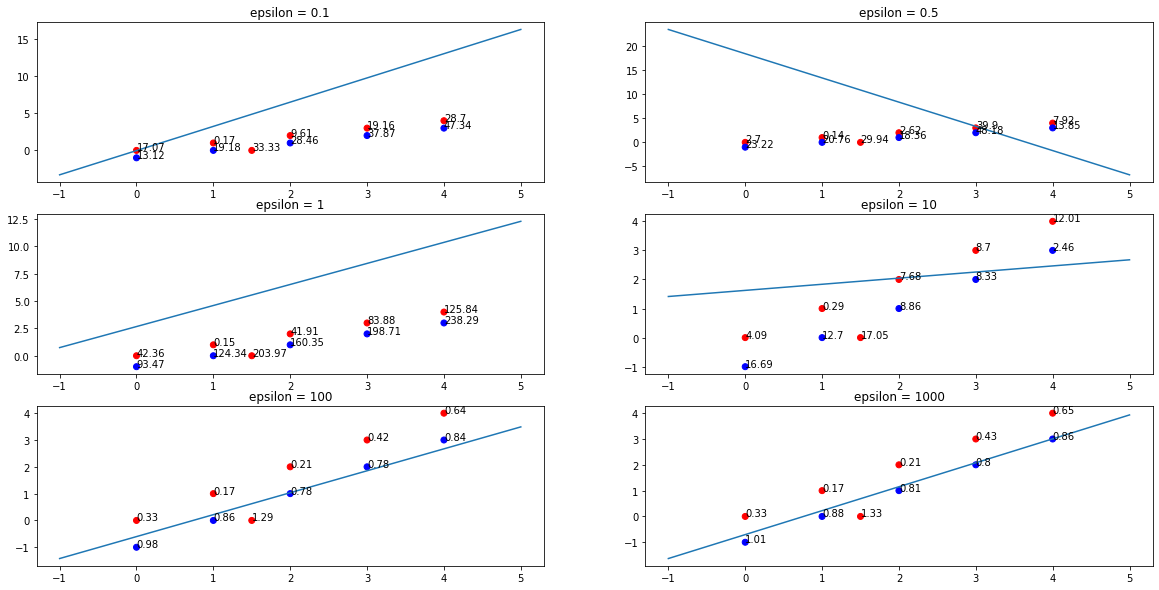

In [ ]:
epsilons = [0.1, 0.5, 1, 10, 100, 1000]

# Plot settingst 
nrows = 3
ncols = 2
assert nrows * ncols = len(epsilons)
fig = plt.figure(figsize=(20, 10))

# Visualization for each epsilon with dp.logistic_regression 
for i, epsilon in enumerate(epsilons):

    dp_clf = dp.LogisticRegression(epsilon=epsilon, data_norm=5)
    dp_clf.fit(X, y)

    # calculate the intercept and slope of the decision boundary.
    b = dp_clf.intercept_[0]
    w1, w2 = dp_clf.coef_.T
    c = -b/w2
    m = -w1/w2

    # plot the data and the classification with the decision boundary.
    xmin, xmax = -1, 5
    ymin, ymax = -1, 5
    xd = np.array([xmin, xmax])
    yd = m*xd + c

    learned_w = np.array([b, w1[0], w2[0]])

    # run fisher information model
    fil_logistic = FIL_Logistic(learned_w, add_bias(X), y)
    fil_values = fil_logistic.compute_all_fils()
    # print(fil_values)

    # Visulization 
    # plt.subplots(row, col)
    fig.add_subplotn(3, 2, i+1)
    plt.plot(xd, yd)
    plt.scatter(X[:,0], X[:,1], color=col)
    for j in range(len(X)):
        plt.text(X[j, 0], X[j, 1], round(fil_values[j],2))
    plt.title('epsilon = {}'.format(epsilon))

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3414c8e1-e8f2-444e-be94-05f51d01b06b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>